In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker_df = pd.read_csv('ticker_data.csv')
factor_df = pd.read_csv('factor_data.csv')

[0.0038639043432896836, 0.0036719596964191383, 0.008694569615259419, -0.004958795831503777, 0.041921470318539336, -0.007184755104057296, 0.012544809536895756, 0.0060551634884065085, 0.01048817908558307, -0.0170571636558064, 0.057079444705118436, -0.006010731930962917, -0.01611192713759203, -0.01240960540585101, -0.031285672023685436, 0.014709278453664645, -0.012523154771492762, 0.010793677057728454, -0.005781625972247627, 0.02312179944902461, -0.022018801977754677, 0.0028822209487346213, 0.043239456549009125, 0.02672040816406112, -0.0005111393204406951, -0.008318259555611586, 0.0088223671756093, -0.005964153777357493, 0.026940007953144513, 0.014563933469641023, -0.038089115755943835, -0.014315496416994544, 0.02567374202977903, -0.02405866739825669, -0.00343922764712086, -0.019697951778382676, 0.009694108478795673, -0.01793001904525062, 0.015626861646589343, -0.03559423800341521, -0.02392902079561369, 0.021095886273398045, 0.017984455361555417, -0.0021667822007389163, 0.0432278821098784

Text(0,0.5,'Expected Return')

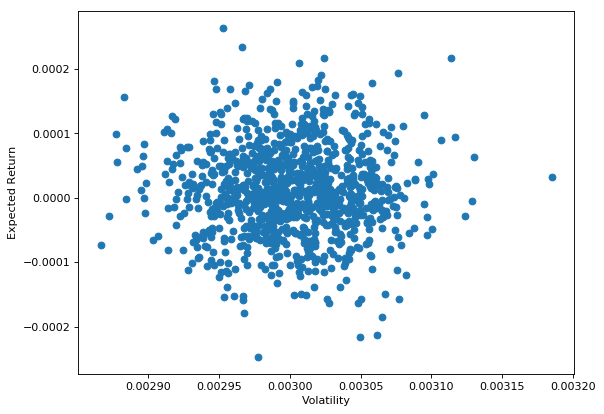

In [31]:
ticker_df = ticker_df.sort_values(by=['ticker','timestep'])

mean = []
stdev = []
sharpe = []

return_array = np.zeros((2519,1000))
z = 0

for i in range(1,2520000,2520):
    return_array[:,z] = ticker_df['returns'][i:i+2519]
    mean.append(ticker_df['returns'][i:i+2519].mean())
    stdev.append(ticker_df['returns'][i:i+2519].std())
    sharpe.append(mean[z]/stdev[z])
    z+=1
    
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(stdev,mean,'o')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')

In [5]:
def rand_weights(n):
    k = np.random.rand(n)
    return k/sum(k)

In [6]:
def random_portfolio(returns):
    '''Returns the mean and standard deviation of returns'''
    
    p = np.asmatrix(np.mean(returns,axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
        
    mu = w*p.T
    sigma = np.sqrt(w*C*w.T)
    
    return mu, sigma

In [ ]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_array) 
    for _ in range(n_portfolios)
])

In [ ]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
plt.show()